In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from sympy import *

Общий вид краевой задачи:

$$k * u_{xx} + p * u_x + q * u = f$$
$$u(a)=u_z, u(b)=u_b$$
 

In [38]:
def jacobi_pol(k, n):
    x = sym.symbols('x')
    p = np.zeros(n + 1, dtype=sym.Symbol)
    p[0] = 1
    if n == 1:
        p[1] = (k + 1) * x
    if n != 1 and n != 0:
        p[1] = (k + 1) * x
        for i in range(n - 1):
            p[i + 2] = ((i + k + 2) * (2 * i + 2 * k + 3) * x * p[i + 1] - (i + k + 2) *
                        (i + k + 1) * p[i]) / ((i + 2 * k + 2) * (i + 2))
    return p

In [39]:
def phi_s(N):
    k = 1
    phi = (1 - x * x) * jacobi_pol(k, N)
    dphi = np.zeros(N + 1, dtype=sym.Symbol)
    ddphi = np.zeros(N + 1, dtype=sym.Symbol)
    for i in range(N + 1):
        dphi[i] = sym.diff(phi[i], x, 1)
    for i in range(N + 1):
        ddphi[i] = sym.diff((dphi[i]), x, 1)
    return phi, dphi, ddphi

In [40]:
def galerkin_method(N):
    A = np.zeros(N + 1, dtype=sym.Symbol)
    B = np.zeros(N + 1)
    C = np.zeros((N + 1, N + 1))
    phi, dphi, ddphi = phi_s(N)
    for i in range(N + 1):
        A[i] = k * ddphi[i] + p * dphi[i] + q * phi[i]
        B[i] = sym.integrate(f * phi[i], (x, a, b))
    for i in range(N + 1):
        for j in range(N + 1):
            C[i, j] = sym.integrate((A[j]) * phi[i], (x, a, b))
    alpha = np.linalg.solve(C, B)
    u = 0
    for i in range(0, N + 1):
        u += alpha[i] * phi[i]
    return u

In [41]:
n=3

$n=1:$
$$-\frac{1}{x-3}u^{\prime\prime}(x)+\left(1+\frac{x}{2}\right)u^\prime(x)+\exp{\frac{x}{2}}u(x)=2 - x,$$
    $$ u(-1)=u(1)=0.$$

In [42]:
if n == 1:
    u_a = 0
    u_b = 0
    a = -1
    b = 1
    x = sym.symbols('x')
    k = -1 / (x - 3)
    p = 1 + x / 2
    q = exp(x / 2)
    f = 2 - x

$n=2:$
    $$-\frac{4-x}{5-2x}u^{\prime\prime}(x)+\frac{1-x}{2}u^\prime(x)+\frac{1}{2}\ln(3+x)u(x)=1+\frac{x}{3},$$
    $$u(-1)=u(1)=0.$$

In [43]:
if n == 2:
    u_a = 0  
    u_b = 0
    a = -1
    b = 1
    x = sym.symbols('x')
    k = -(4 - x) / (5 - 2 * x)
    p = (1 - x) / 2
    q = (ln(3 + x)) / 2
    f = 1 + x / 3

$n=3:$
$$-\frac{7-x}{8+3x}u^{\prime\prime}(x)+\left(1+\frac{x}{3}\right)u^\prime(x)+\left(1-\frac{1}{2}\exp{\frac{x}{2}}\right)u(x)=\frac{1}{2}-\frac{x}{3},$$
    $$u(-1)=u(1)=0.$$

In [44]:
if n == 3:
    u_a = 0 
    u_b = 0
    a = -1
    b = 1
    x = sym.symbols('x')
    k = - (7 - x) / (8 + 3 * x)
    p = 1 + x / 3
    q = 1 - exp(x / 2) / 2
    f = 1 / 2 - x / 3

Рисуем графики

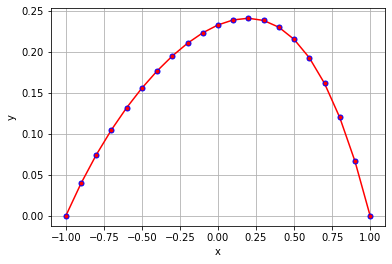

In [45]:
N = 2
u = galerkin_method(N)
h = 0.1
n = round((b - a) / h)
x1 = np.zeros(n + 1)
y = np.zeros(n + 1, dtype=sym.Symbol)
for i in range(n + 1):
    x1[i] = a + i * h
    y[i] = u.subs(x, x1[i])
plt.plot(x1, y, marker='.', color='red', mec='blue', ms=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()